# MPSLIB in Google Colab
This is a simple exmaple of running MPSLIB online in Google Colab

## INSTALL MPSLIB (simple) (only needed once on google colab)

In [1]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
        
except ImportError:
    print('%s cannot be loaded. trying to install it.' % module_name)
    #curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
    #sh ./install_latest_mpslib.sh
        

mpslib allready installed. skipping installation.


##INSTALL MPSLIB (only needed once on google colab)

In [0]:
import os

In [3]:
# Get code from GITHUB
os.chdir('/content')
!rm -fr mpslib && git clone https://github.com/ergosimulation/mpslib.git
# Compile
os.chdir('/content/mpslib')
!make clean
!make
!pwd
!ls

Cloning into 'mpslib'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 3023 (delta 234), reused 223 (delta 101), pack-reused 2652
Receiving objects: 100% (3023/3023), 23.91 MiB | 21.93 MiB/s, done.
Resolving deltas: 100% (2079/2079), done.
rm -f *.o mps mpslib/*.o mpslib/mpslib.a
make -C mpslib
make[1]: Entering directory '/content/mpslib/mpslib'
g++ -o ENESIM.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c ENESIM.cpp
g++ -o Coords3D.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c Coords3D.cpp
g++ -o MPSAlgorithm.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c MPSAlgorithm.cpp
g++ -o Coords4D.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c Coords4D.cpp
g++ -o IO.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c IO.cpp
g++ -o SNESIM.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c SNESIM.cpp
g++ -o Utility.o -I. -O3 -std=c++11 -static -Wl,--no-as-needed -c Utility.cp

### Install scikit mps (Pyhton interface to MPSlib)

In [4]:
os.chdir('/content/mpslib/scikit-mps')
!pip install -e .

Obtaining file:///content/mpslib/scikit-mps
  Found existing installation: scikit-mps 0.1.0
    Can't uninstall 'scikit-mps'. No files were found to uninstall.
  Running setup.py develop for scikit-mps


### Install vista (for 3D plotting)

In [0]:
#!pip install vista

# MPSLIB IN PYTHON

In [2]:
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt

### Load a training image

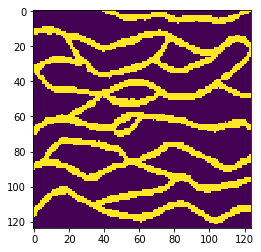

In [12]:
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.checkerboard2()
#TI, TI_filename = mps.trainingimages.rot90()

plt.imshow(TI[:,:,0].T)

### Setup msplib

In [20]:
O = mps.mpslib(method='mps_snesim_tree',
                    verbose_level=-1, debug_level=-1)
#O = mps.mpslib(method='mps_genesim')
O.parameter_filename = 'mps.txt'
O.par['n_real']=9
O.par['n_cond']=36
O.par['template_size']=np.array([[10,5],[10,5],[1,1]])
O.par['origin']=np.array([0,0,0])
O.par['simulation_grid_size']=np.array([40,20,1])

# hard data
O.d_hard = np.array([[ 10, 5, 0, 1],
                       [ 30, 15, 0, 0]])

# soft data
O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
                       [ 30, 5, 0, 0.9, 0.1]])


# show parameter setting
O.par


{'n_real': 100,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': 'ti.dat',
 'simulation_grid_size': array([40, 20,  1]),
 'origin': array([0, 0, 0]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': -1,
 'debug_level': -1,
 'n_cond': 36,
 'n_cond_soft': 1,
 'n_max_ite': 1000000,
 'distance_measure': 1,
 'distance_min': 0,
 'distance_pow': 1,
 'colocate_dimension': 0,
 'max_search_radius': 10000000,
 'max_search_radius_soft': 10000000,
 'template_size': array([[10,  5],
        [10,  5],
        [ 1,  1]])}

###Run MPSLIB

In [21]:
O.ti = TI
O.run_parallel()
#O.run()


parallel: using 7 threads to simulate 100 realizations
parallel: with up to 15 relizations per thread
parallel: Using 7 of max 7 threads
__name__ = mpslib.mpslib
parallel job done. Collecting data from threads
parallel: collected 100 realizations


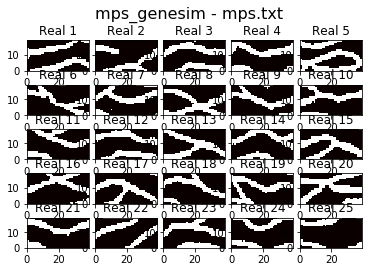

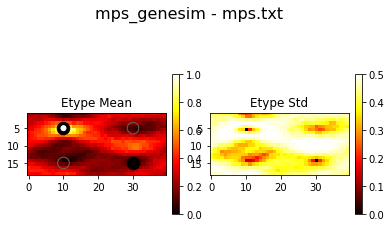

In [22]:
O.plot_reals()
O.plot_etype()